<a href="https://colab.research.google.com/github/R1shiY/Projects/blob/main/PianoMelodyImprovisor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from music21 import stream, note, chord, key, meter, tempo, midi
import matplotlib.pyplot as plt
import random

# Function to generate chord progressions based on rules
def generate_chord_progression(starting_chord, num_chords, cadence):
    chords = ["I", "vi", "IV", "V", "ii", "iii"]
    progression_rules = {
        "I": ["vi", "IV", "V", "ii"],
        "vi": ["IV", "V", "I", "ii"],
        "IV": ["I", "V", "vi", "iii"],
        "V": ["I", "IV", "vi"],
        "iii": ["vi", "I", "IV", "ii"],
        "ii": ["V", "IV", "iii"]
    }

    # Define cadences
    cadences = {
        "Authentic": ["V", "I"],
        "Half": ["ii", "V"],
        "Plagal": ["IV", "I"],
        "Deceptive": ["V", "vi"]
    }

    progression = [starting_chord]
    for _ in range(num_chords - 2):  # Generate chords excluding the cadence
        current_chord = progression[-1]
        next_chord = random.choice(progression_rules[current_chord])
        progression.append(next_chord)

    # Append the cadence
    progression.extend(cadences.get(cadence, ["V", "I"]))  # Default to Authentic cadence
    return progression

In [ ]:
# Function to generate a three-part composition
def generate_three_part_writing(progression, key_signature, tempo_bpm):
    composition = stream.Score()
    part1 = stream.Part()  # Soprano
    part2 = stream.Part()  # Alto
    part3 = stream.Part()  # Bass

    composition.append(key.Key(key_signature))  # Add key signature
    composition.append(meter.TimeSignature("4/4"))  # Fixed time signature
    composition.append(tempo.MetronomeMark(number=tempo_bpm))  # Add tempo

    # Define chord tones for major keys
    major_chord_tones = {
        "C": ["C", "D", "E", "F", "G", "A", "B"],
        "G": ["G", "A", "B", "C", "D", "E", "F#"],
        "D": ["D", "E", "F#", "G", "A", "B", "C#"],
        "A": ["A", "B", "C#", "D", "E", "F#", "G#"],
        "E": ["E", "F#", "G#", "A", "B", "C#", "D#"],
        "B": ["B", "C#", "D#", "E", "F#", "G#", "A#"],
        "F#": ["F#", "G#", "A#", "B", "C#", "D#", "E#"],
        "Db": ["Db", "Eb", "F", "Gb", "Ab", "Bb", "C"],
        "Ab": ["Ab", "Bb", "C", "Db", "Eb", "F", "G"],
        "Eb": ["Eb", "F", "G", "Ab", "Bb", "C", "D"],
        "Bb": ["Bb", "C", "D", "Eb", "F", "G", "A"],
        "F": ["F", "G", "A", "Bb", "C", "D", "E"]
    }

    chord_tones = major_chord_tones[key_signature]
    roman_to_chord = {
        "I": [chord_tones[0], chord_tones[2], chord_tones[4]],
        "ii": [chord_tones[1], chord_tones[3], chord_tones[5]],
        "iii": [chord_tones[2], chord_tones[4], chord_tones[6]],
        "IV": [chord_tones[3], chord_tones[5], chord_tones[0]],
        "V": [chord_tones[4], chord_tones[6], chord_tones[1]],
        "vi": [chord_tones[5], chord_tones[0], chord_tones[2]],
    }

    soprano_line, alto_line, bass_line = [], [], []

    for chord_name in progression:
        curr_chord = roman_to_chord[chord_name]
        sorted_chord = sorted(curr_chord, key=lambda pitch: note.Note(pitch).pitch.midi)

        # Ensure no voice crossing
        soprano, alto, bass = sorted_chord[2], sorted_chord[1], sorted_chord[0]
        soprano_line.append(soprano)
        alto_line.append(alto)
        bass_line.append(bass)

        # Add melody (soprano)
        part1.append(note.Note(soprano, quarterLength=1))

        # Add middle voice (alto)
        part2.append(note.Note(alto, quarterLength=1))

        # Add bass
        part3.append(note.Note(bass, quarterLength=1))

    # Combine all parts into the score
    composition.insert(0, part1)
    composition.insert(0, part2)
    composition.insert(0, part3)

    return composition, soprano_line, alto_line, bass_line


In [ ]:
# Function to visualize chord progression
def visualize_chord_progression(soprano, alto, bass):
    plt.figure(figsize=(10, 6))
    plt.plot(soprano, label="Soprano", marker="o", linestyle="-", color="blue")
    plt.plot(alto, label="Alto", marker="x", linestyle="--", color="green")
    plt.plot(bass, label="Bass", marker="s", linestyle="-.", color="red")

    plt.title("Three-Part Writing: Voice Leading")
    plt.xlabel("Chord Progression Steps")
    plt.ylabel("Pitch (MIDI)")
    plt.legend()
    plt.grid(True)
    plt.show()


Welcome to the Three-Part Composition Generator!
Enter the starting chord (e.g., I, V, IV): iii
Enter the number of chords in the progression not counting the first (e.g., 4, 5, 6): 5
Enter the cadence type (Authentic, Half, Plagal, Deceptive): Half
Enter the key signature (e.g., C, G, D): C
Enter the tempo in BPM (e.g., 66 for Adagio, 120 for Allegro): 100
Generated Chord Progression: ['iii', 'vi', 'IV', 'V', 'ii', 'V']
Composition saved as three_part_composition.mid!


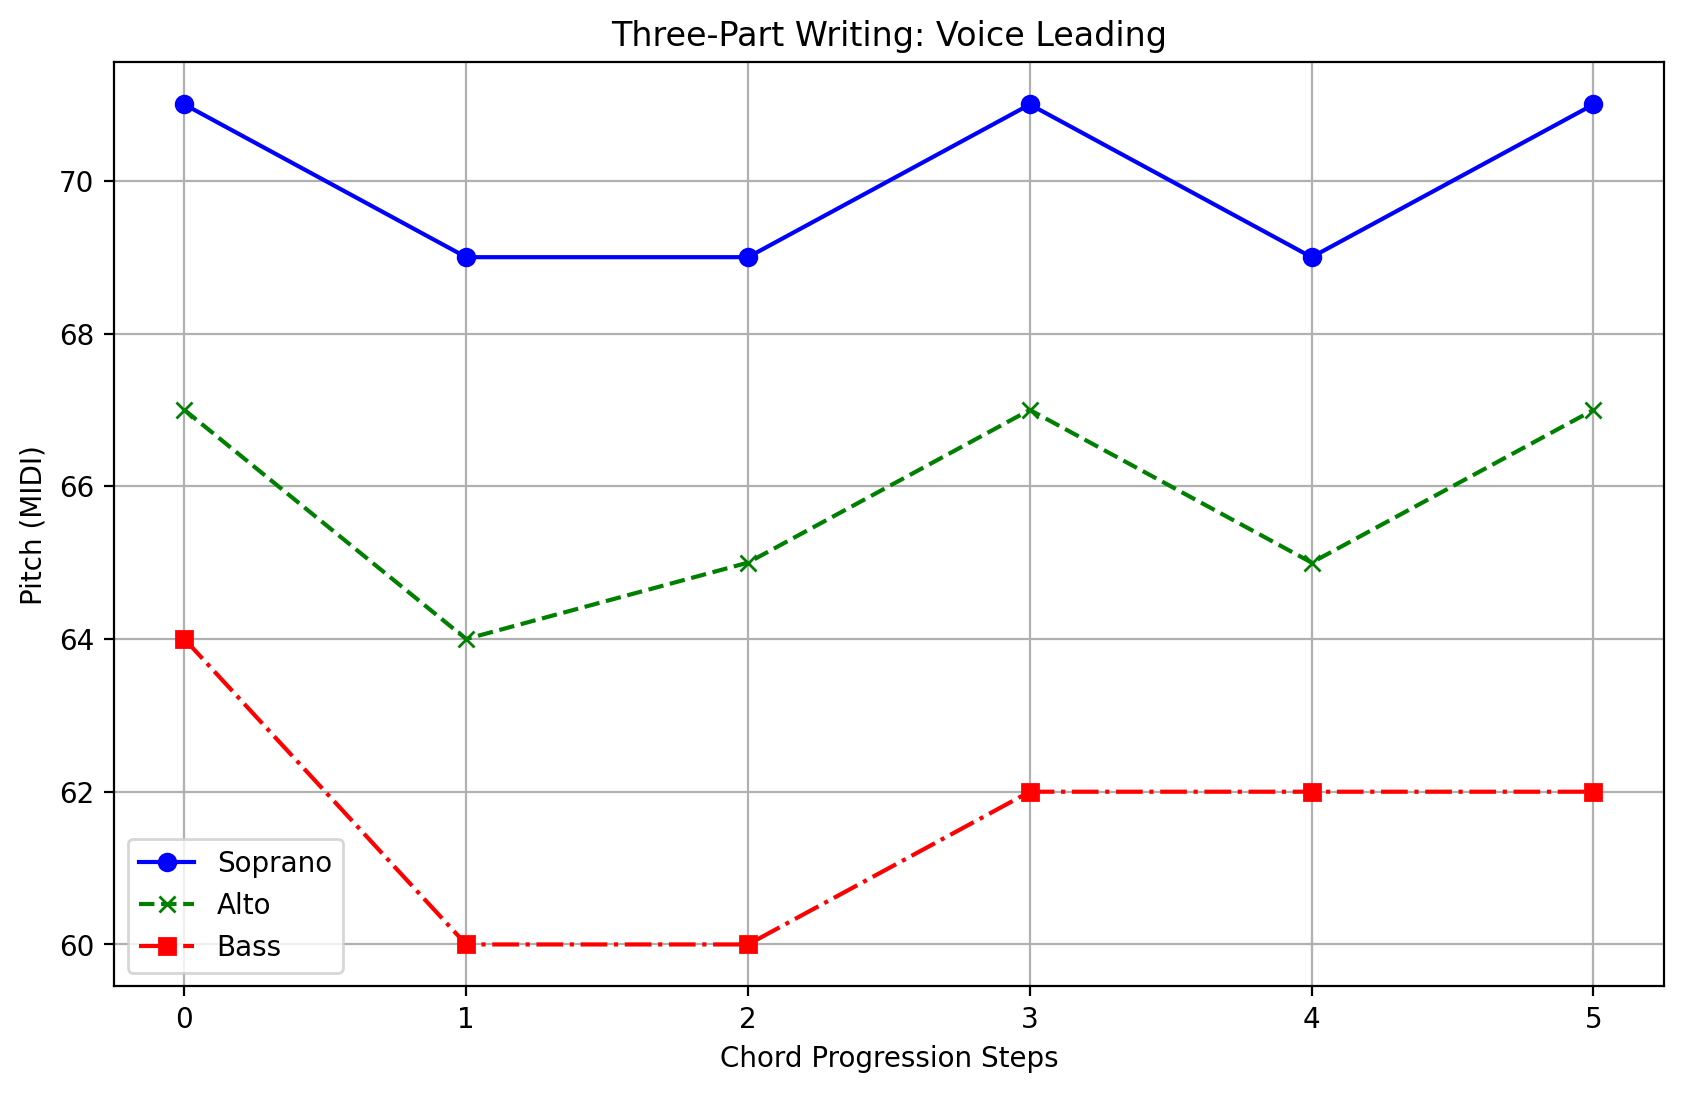

In [ ]:
# Main program
if __name__ == "__main__":
    print("Welcome to the Three-Part Composition Generator!")

    # Take user inputs
    starting_chord = input("Enter the starting chord (e.g., I, V, IV): ")
    num_chords = int(input("Enter the number of chords in the progression not counting the first (e.g., 4, 5, 6): "))
    cadence = input("Enter the cadence type (Authentic, Half, Plagal, Deceptive): ")
    key_signature = input("Enter the key signature (e.g., C, G, D): ")
    tempo_bpm = int(input("Enter the tempo in BPM (e.g., 66 for Adagio, 120 for Allegro): "))

    # Generate chord progression
    chord_progression = generate_chord_progression(starting_chord, num_chords, cadence)
    print(f"Generated Chord Progression: {chord_progression}")

    # Generate composition
    composition, soprano_line, alto_line, bass_line = generate_three_part_writing(chord_progression, key_signature, tempo_bpm)

    # Save the composition as a MIDI file
    midi_filename = "three_part_composition.mid"
    mf = midi.translate.music21ObjectToMidiFile(composition)
    mf.open(midi_filename, 'wb')
    mf.write()
    mf.close()

    print(f"Composition saved as {midi_filename}!")

    visualize_chord_progression(
        [note.Note(p).pitch.midi for p in soprano_line],
        [note.Note(p).pitch.midi for p in alto_line],
        [note.Note(p).pitch.midi for p in bass_line],
    )